# Module: Sélection de Modele


+ Train Test Split
+ Cross Validation
+ Validation curve
+ GridSearch CV
+ Confusion Matrix
+ Learning Curve

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

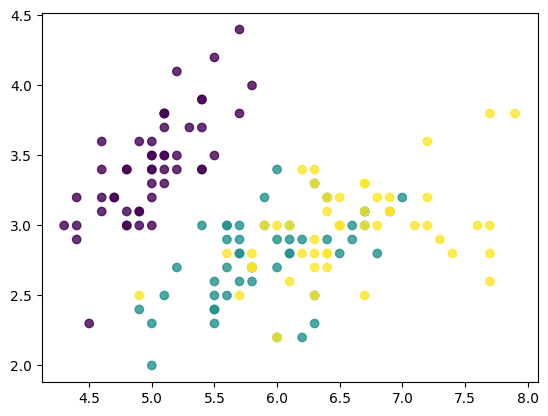

In [4]:
X = iris.data
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

In [5]:
X[:, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

## 1. Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


Text(0.5, 1.0, 'Test set')

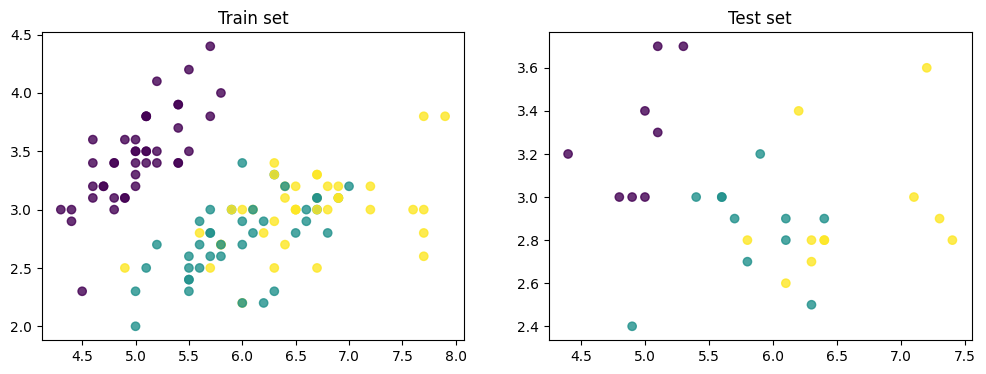

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1],c=y_test, alpha=0.8)
plt.title('Test set')

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 1.0
test score: 0.9


## 2. Validation Set et Cross Validation

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
model = KNeighborsClassifier()
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

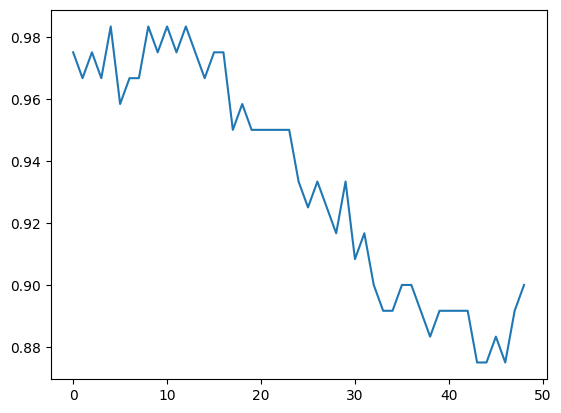

In [13]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

## 3. Validation Curve

In [14]:
from sklearn.model_selection import validation_curve

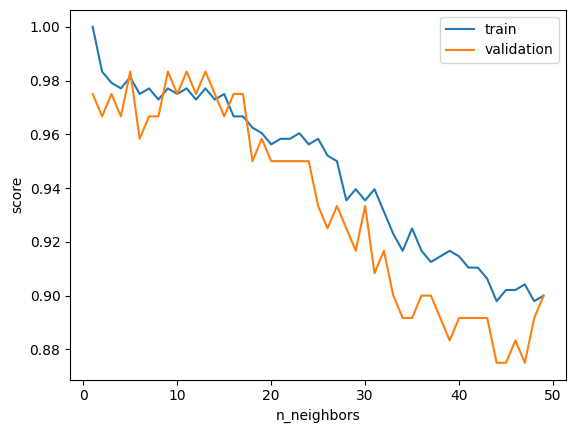

In [15]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train,param_name=
                                          'n_neighbors', param_range=k, cv=5, scoring='accuracy')

plt.plot(k, train_score.mean(axis=1), label='train')
plt.plot(k, val_score.mean(axis=1), label='validation')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [16]:
from sklearn.model_selection import learning_curve

In [17]:
# train_sizes
import numpy as np
np.linspace(0.2, 1.0, num=5)

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [18]:
# train_sizes => quantite de donnees a entrer par petite quantite
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes= np.linspace(0.2, 1.0, num=5), cv = 5 )

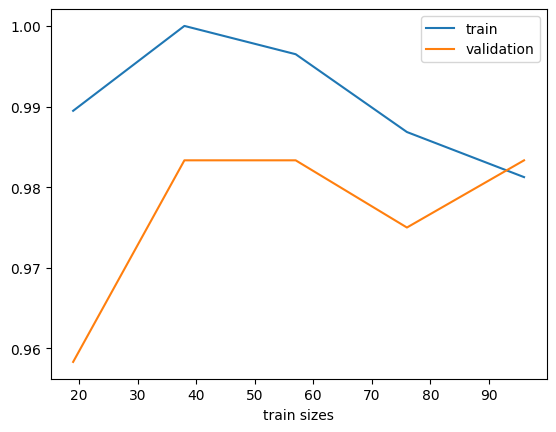

In [19]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train sizes')
plt.legend()

##4. GridSearchCV

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = {
    'n_neighbors': np.arange(1, 20),
    'metric': ['euclidean', 'manhattan'],
    'leaf_size' : np.arange(1, 40)
    }

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [22]:
print(grid.best_score_)
print(grid.best_params_)

0.9833333333333334
{'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 5}


In [23]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9333333333333333

In [24]:
model_KNN_best = KNeighborsClassifier(leaf_size= 1, metric= 'euclidean', n_neighbors= 5)

In [25]:
model_KNN_best.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, metric='euclidean')

In [26]:
import joblib

joblib.dump(model_KNN_best, "best_model.pkl")

['best_model.pkl']

## 5. Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [34]:
conf_mat = confusion_matrix(y_test, model.predict(X_test))
conf_mat

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

In [40]:
xticklabels =['setosa', 'versicolor', 'virginica']
yticklabels = ['setosa', 'versicolor', 'virginica']

<Axes: >

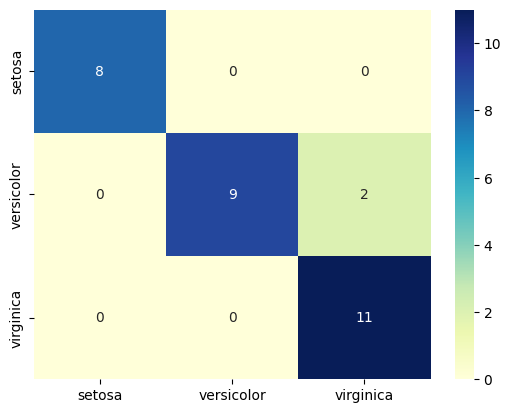

In [43]:
import seaborn as sns
sns.heatmap(conf_mat,cmap="YlGnBu", annot=True, xticklabels=xticklabels, yticklabels=yticklabels)


### regression => RMSE , MAE, ....|y - ypred| or (y**2 - ypred**2)
### Classification => precision, recall, sensiility, f1, etc...
model.score

In [48]:
print(f'precision : {precision_score(y_test, model.predict(X_test), average = "micro")}')

print(f' recall : {recall_score(y_test, model.predict(X_test), average = "macro")}')
print(f' f1 : {f1_score(y_test, model.predict(X_test), average = "weighted")}')


precision : 0.9333333333333333
 recall : 0.9393939393939394
 f1 : 0.9327777777777777


# Classification Report

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.82      0.90        11
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30


## 6. Learning Curve

In [31]:
from sklearn.model_selection import learning_curve

[ 9 19 28 38 48 57 67 76 86 96]


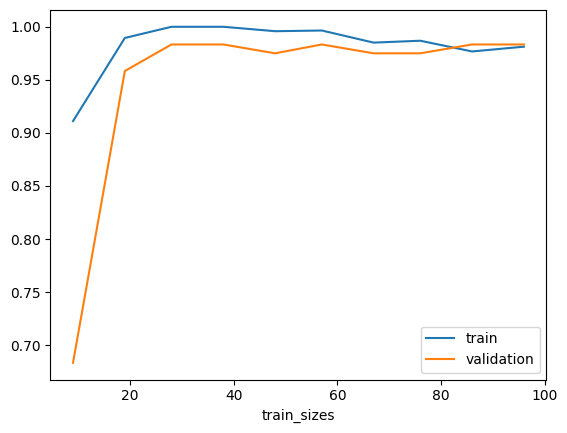

In [32]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()